In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Load and process data

In [2]:
train = pd.read_csv("../dataset/trainset.csv")
test = pd.read_csv("../dataset/testset.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501546 entries, 0 to 1501545
Data columns (total 40 columns):
aspect_ratio                      1501546 non-null float64
courant_number                    1501546 non-null float64
shockfront_courant_number         1501546 non-null float64
shockfront_number_ratio           1501546 non-null float64
min_total_mobility                1501546 non-null float64
max_total_mobility                1501546 non-null float64
average_total_mobility            1501546 non-null float64
min_Darcy_velocity                1501546 non-null float64
max_Darcy_velocity                1501546 non-null float64
average_Darcy_velocity            1501546 non-null float64
min_shockfront_mobratio           1501546 non-null float64
max_shockfront_mobratio           1501546 non-null float64
average_shockfront_mobratio       1501546 non-null float64
average_longitudinal_capillary    1501546 non-null float64
average_transverse_capillary      1501546 non-null float64
ma

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375387 entries, 0 to 375386
Data columns (total 40 columns):
aspect_ratio                      375387 non-null float64
courant_number                    375387 non-null float64
shockfront_courant_number         375387 non-null float64
shockfront_number_ratio           375387 non-null float64
min_total_mobility                375387 non-null float64
max_total_mobility                375387 non-null float64
average_total_mobility            375387 non-null float64
min_Darcy_velocity                375387 non-null float64
max_Darcy_velocity                375387 non-null float64
average_Darcy_velocity            375387 non-null float64
min_shockfront_mobratio           375387 non-null float64
max_shockfront_mobratio           375387 non-null float64
average_shockfront_mobratio       375387 non-null float64
average_longitudinal_capillary    375387 non-null float64
average_transverse_capillary      375387 non-null float64
max_longitudinal_ca

In [6]:
#train = train[train.backtrack_par_factor!=-0.01]
print('Train instances: ', train.shape[0])
#test = test[test.backtrack_par_factor!=-0.01]
print('Test instances: ', test.shape[0])

Train instances:  1501546
Test instances:  375387


In [7]:
print('Test train split: ',f'{test.shape[0]/(train.shape[0]+test.shape[0]):.2f}')

Test train split:  0.20


## Split inputs (X) and outputs (y)

In [8]:
features = ['aspect_ratio',
        'courant_number',
        'shockfront_courant_number',
        'shockfront_number_ratio',
        #'min_total_mobility',
        #'max_total_mobility',
        'average_total_mobility',
        #'min_Darcy_velocity',
        #'max_Darcy_velocity',
        'average_Darcy_velocity',
        #'min_shockfront_mobratio',
        #'max_shockfront_mobratio',
        'average_shockfront_mobratio',
        'average_longitudinal_capillary',
        'average_transverse_capillary',
        #'max_longitudinal_capillary',
        #'max_transverse_capillary',
        #'min_longitudinal_capillary',
        #'min_transverse_capillary',
        'average_buoyancy_number',
        'average_longitudinal_buoyancy',
        'average_transverse_buoyancy',
        #'max_buoyancy_number',
        #'max_longitudinal_buoyancy',
        #'max_transverse_buoyancy',
        #'min_buoyancy_number',
        #'min_longitudinal_buoyancy',
        #'min_transverse_buoyancy',
        'average_overrelaxation',
        #'max_overrelaxation',
        #'min_overrelaxation',
        #'average_invPeclet',
        #'max_invPeclet',
        #'min_invPeclet',
        'res',
        'resold',
        'res_resold',
         #'backtrack_par_factor',
         #'outer_nonlinear_iteration',
        'Inner_non_linear_iterations']

# Train set
X_train = train[features]
y_train = train["backtrack_par_factor"].values
# Test set
X_test = test[features]
y_test = test["backtrack_par_factor"].values

## Normalize data

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

stdnorm_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train_stdnorm = stdnorm_pipeline.fit_transform(X_train)
X_test_stdnorm = stdnorm_pipeline.transform(X_test)

In [10]:
# Normalize data for checking
mean = X_train.mean(axis=0)
std = X_train.std(axis=0, ddof=0)
X_train_stdnorm2 = (X_train - mean)/std 
X_test_stdnorm2 = (X_test - mean)/std

print("mean:\n", mean)
print("\nstd:\n", std)

mean:
 aspect_ratio                      4.606498e+00
courant_number                    4.134381e+01
shockfront_courant_number         1.312609e+01
shockfront_number_ratio           1.869254e-02
average_total_mobility            7.138944e+02
average_Darcy_velocity            3.206514e-06
average_shockfront_mobratio       1.012754e+00
average_longitudinal_capillary    3.133900e-03
average_transverse_capillary      8.245164e-02
average_buoyancy_number           9.482336e-02
average_longitudinal_buoyancy     1.752161e-01
average_transverse_buoyancy       2.600834e+00
average_overrelaxation           -2.709370e+09
res                               2.655941e-06
resold                            1.865938e-05
res_resold                        8.406276e-01
Inner_non_linear_iterations       1.148470e+01
dtype: float64

std:
 aspect_ratio                      1.685133e+00
courant_number                    2.110226e+03
shockfront_courant_number         6.861566e+02
shockfront_number_ratio        

In [11]:
print(np.allclose(X_train_stdnorm, X_train_stdnorm2.values))
print(np.allclose(X_test_stdnorm, X_test_stdnorm2.values))

True
True


# Fine Tuning

## Tensorflow NN

In [16]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam

# for reproducibility
tf.random.set_seed(42) 
np.random.seed(42)  

print(tf.__version__)

2.0.0


In [17]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Model
def create_model(hiden_layers, neurons, dropout, kreg, activation, lr):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(17,), activation=activation, kernel_regularizer=l2(kreg)))
    if dropout >1e-3:
        model.add(Dropout(dropout))
    for i in range(hiden_layers):
        model.add(Dense(neurons, activation=activation, kernel_regularizer=l2(kreg)))
        if dropout >1e-3:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error',
                  optimizer= Adam(lr), # rmsprop, adam, sgd, adagrad
                  metrics=['mean_squared_error'])
    return model

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                               min_delta=0.0,
                                               patience=50,
                                               verbose=0,
                                               restore_best_weights=True)

model = KerasRegressor(build_fn=create_model,  epochs=500, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'hiden_layers':[2, 4, 6],
     'batch_size': [256], 
     'neurons': [128, 256, 512], 
     'dropout': [0.0, 0.1, 0.3],
     'kreg': [1e-2, 1e-3, 1e-4],
     'activation': ['relu'],
     'lr':[1e-3, 1e-4, 1e-5]}   
    ]

grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=3,
                           verbose = 10,
                           n_jobs= 20)

grid_search.fit(X_train_stdnorm, y_train*2+1, callbacks = [early_stopping])

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed: 173.2min
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed: 282.2min
/home/viluiz/anaconda3/envs/py3ml/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed: 491.3min
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed: 633.0min
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed: 868.7min
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed: 1145.5min
[Parallel(n_jobs=20)]: Done  73 tasks      | elapsed: 1560.2min
[Parallel(n_jobs=20)]: Done  88 tasks      | elapsed: 1919.0min
[Parallel(n_jobs=20)]: Done 105 tasks      | elapsed: 2431.8min
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:

*** *Notebook finished the grid search but stop writing the results***

In [29]:
#Loading the best model (Notebook crashed and did not save the gridserach variables, only the best model)
from tensorflow.keras.models import load_model
reg_best = load_model("NNmodel.h5") 

#print(grid_search.best_params_, end='\n')
#print(grid_search.best_estimator_)

In [31]:
reg_best.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               9216      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

start = time.time()
y_train_pred = (reg_best.predict(X_train_stdnorm)-1)/2
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_train, y_train_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_train, y_train_pred)
print('mae: ',mae)

r2 = r2_score(y_train, y_train_pred)
print('\nR2: ',r2)

time =  -97.63014006614685

mse:  0.016970423725660762
rmse:  0.13027057889508575
mae:  0.08194609790648426

R2:  0.8360919904010823


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

start = time.time()
y_test_pred = (reg_best.predict(X_test_stdnorm)-1)/2
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_test, y_test_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_test, y_test_pred)
print('mae: ',mae)

r2 = r2_score(y_test, y_test_pred)
print('\nR2: ',r2)

time =  -22.68078589439392

mse:  0.018426570778553534
rmse:  0.13574450551883688
mae:  0.08453678297820019

R2:  0.8222877891793889


rmse -0.01:  0.153   |   mae -0.01:  0.101
rmse -0.1:  0.115   |   mae -0.1:  0.069
rmse -0.2:  0.114   |   mae -0.2:  0.074
rmse -0.3:  0.100   |   mae -0.3:  0.064
rmse -0.4:  0.093   |   mae -0.4:  0.061
rmse -0.5:  0.098   |   mae -0.5:  0.066
rmse -0.6:  0.109   |   mae -0.6:  0.073
rmse -0.7:  0.132   |   mae -0.7:  0.092
rmse -0.8:  0.153   |   mae -0.8:  0.099
rmse -0.9:  0.187   |   mae -0.9:  0.119
rmse -1.0:  0.201   |   mae -1.0:  0.124


Text(0, 0.5, 'mae')

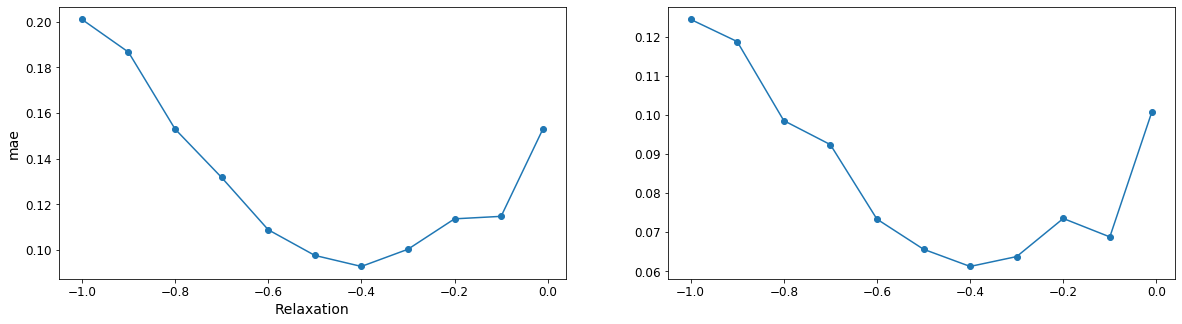

In [34]:
rmse = []
mae = []
btpf = [-0.01, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
btpf_plot = []
for i in btpf:
    if np.any(y_test==i):
        btpf_plot.append(i)
        rmse.append(np.sqrt(mean_squared_error(y_test[y_test==i], y_test_pred[y_test==i])))
        mae.append(mean_absolute_error(y_test[y_test==i], y_test_pred[y_test==i]))
        print(f'rmse {i}: ', f'{rmse[-1]:.3f}', '  |' ,f'  mae {i}: ', f'{mae[-1]:.3f}')

fig,ax = plt.subplots(1,2,figsize=(20,5))        
ax[0].plot(btpf_plot,rmse,'o-')
ax[0].set_xlabel('Relaxation')
ax[0].set_ylabel('rmse')
ax[1].plot(btpf_plot,mae,'o-')
ax[0].set_xlabel('Relaxation')
ax[0].set_ylabel('mae')

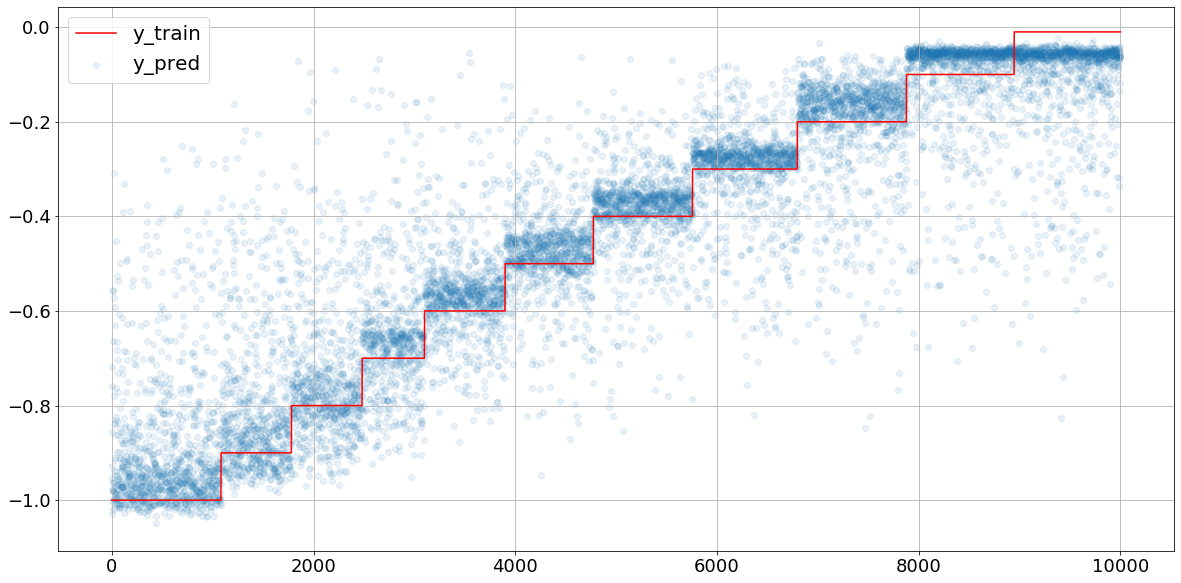

In [35]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, ax = plt.subplots(1,1, figsize=[20,10])

aux_train = y_train[:10000]
aux_pred = y_train_pred[:10000]
index = np.argsort(aux_train)
x = range(len(index))
plt.plot(x, aux_train[index], 'r-')
plt.scatter(x, aux_pred[index], alpha=0.1)
plt.legend(['y_train', 'y_pred'])
#plt.ylim([-10,70])
plt.grid()
plt.show()

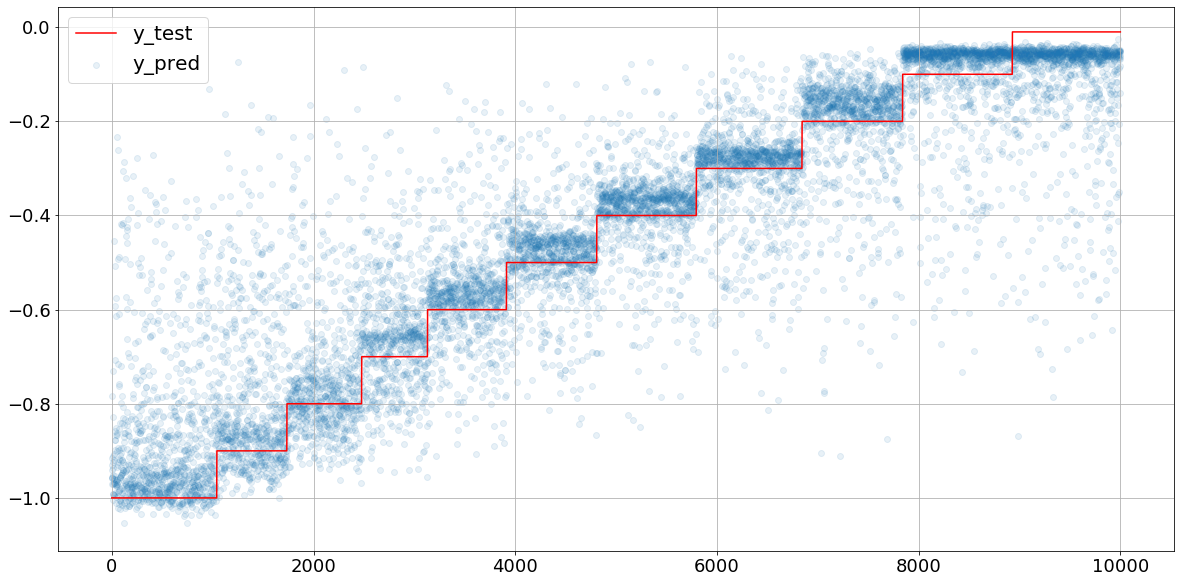

In [36]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, ax = plt.subplots(1,1, figsize=[20,10])

aux_test = y_test[:10000]
aux_pred = y_test_pred[:10000]
index = np.argsort(aux_test)
x = range(len(index))
plt.plot(x, aux_test[index], 'r-')
plt.scatter(x, aux_pred[index], alpha=0.1)
plt.legend(['y_test', 'y_pred'])
#plt.ylim([-10,70])
plt.grid()
plt.show()

## Run time

In [37]:
start = time.time()
for i in range(1000):  
    reg_best.predict(X_test_stdnorm[0:1])
end = time.time()
print("time = ", (start - end)/1000)
print()

time =  -0.049417452335357666



## Model persistence

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import load_model
#grid_search.best_estimator_.model.save("NNmodel.h5")
NNmodel_loaded = load_model("NNmodel.h5") 

import joblib
#joblib.dump(stdnorm_pipeline, "stdnorm_pipeline.pkl") 
stdnorm_pipeline_loaded = joblib.load("stdnorm_pipeline.pkl")

print('rmse: ', np.sqrt(mean_squared_error(
                y_test, (NNmodel_loaded.predict(stdnorm_pipeline_loaded.transform(X_test))-1)/2)))

rmse:  0.13574450551883688


In [19]:
start = time.time()
NNmodel_loaded = load_model("NNmodel.h5") 
stdnorm_pipeline_loaded = joblib.load("stdnorm_pipeline.pkl")
end_load = time.time()
print('Load time = ', end_load - start)
for i in range(1000):    
    y_pred = (NNmodel_loaded(stdnorm_pipeline_loaded.transform(X_test[0:1])) -1)/2
print('Prediction time = ', (time.time() - end_load)/1000)
print(y_pred)

Load time =  1.4469006061553955
Prediction time =  0.003088639974594116
[[-0.39449137]]
